# 使用nilearn绘制ROI图像

In [134]:
import os

In [162]:
dir_path = '/root/workspace/Helium-327-SegBrats/outputs//2024-10-29_13-31-38_best@e39_Down_SE2_UNET3D__diceloss0.1417_dice0.8656_2024-10-28_22-14-17_15/P3'

p_name = os.path.basename(dir_path)
save_path = os.path.join(os.path.dirname(dir_path), f'{p_name}_roi')

os.makedirs(save_path, exist_ok=True)

In [163]:
import nilearn as nl
import nilearn.plotting as nlplt

In [164]:
file_list = os.listdir(dir_path)
file_list.sort()
file_list

['P3_test_input_flair.nii.gz',
 'P3_test_input_mask.nii.gz',
 'P3_test_input_t1.nii.gz',
 'P3_test_input_t1ce.nii.gz',
 'P3_test_input_t2.nii.gz',
 'P3_test_pred.nii.gz']

In [165]:
t1_name = f'{p_name}_test_input_t1.nii.gz'
t1ce_name = f'{p_name}_test_input_t1ce.nii.gz'
t2_name = f'{p_name}_test_input_t2.nii.gz'
flair_name = f'{p_name}_test_input_flair.nii.gz'
mask_name = f'{p_name}_test_input_mask.nii.gz'
pred_name = f'{p_name}_test_pred.nii.gz'


In [166]:
t1_path = os.path.join(dir_path, t1_name)
t1ce_path = os.path.join(dir_path, t1ce_name)
t2_path = os.path.join(dir_path, t2_name)
flair_path = os.path.join(dir_path, flair_name)
mask_path = os.path.join(dir_path, mask_name)
pred_path = os.path.join(dir_path, pred_name)

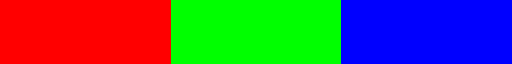

In [167]:
# 自定义一个颜色映射，将索引0映射为灰色，索引1映射为红色，索引2映射为绿色，索引3映射为紫色


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

colors = [(1, 0, 0),  # 红色代表NCR 1
          (0, 1, 0),  # 绿色代表ED 水肿， 2
          (0, 0, 1)]  # 蓝色代表ET， 3

custom_cmap = ListedColormap(colors)

custom_cmap

In [168]:
t1_img = nl.image.load_img(t1_path)
t1ce_img = nl.image.load_img(t1ce_path)
t2_img = nl.image.load_img(t2_path)
flair_img = nl.image.load_img(flair_path)
mask_img = nl.image.load_img(mask_path)
pred_img = nl.image.load_img(pred_path)

In [169]:
def nlplot_nii(nl_img, title,  display_mode, cut_coords, ax=None, bg_img=None, plot_type='roi', cmap='cool', alpha=0.6, colorbar=True):
    """
    绘制nii图像
    :param nl_img: nilearn图像对象
    :param title: 图像标题
    :param display_mode: 显示模式，例如'ortho'、'xz'、'yx'等
    :param cut_coords: 裁剪坐标，例如(0, 0, 0)、(0, 0, 10)等
    :param plot_type: 绘图类型，例如'roi'、'contour'等
    :param cmap: 颜色映射，例如'cool'、'hot'、'gray'等
    :param alpha: 透明度，取值范围为0到1
    :param colorbar: 是否显示颜色条
    :return: None
    """
    if plot_type == 'roi':
        nlplt.plot_roi(nl_img, 
                       title=title, 
                       bg_img=bg_img,
                       display_mode=display_mode, 
                       cut_coords=cut_coords, 
                       cmap=cmap, 
                       alpha=alpha,
                       axes=ax, 
                       colorbar=colorbar)
    elif plot_type == 'anat':
        nlplt.plot_anat(nl_img,
                        title=title,
                        display_mode=display_mode,
                        cut_coords=cut_coords,
                        cmap='bone', 
                        alpha=alpha,
                        axes=ax, 
                        colorbar=colorbar)
    else:
        raise ValueError('plot_type must be either "roi" or "anat"')

In [170]:
x_cut_coords = list(range(-95, -125, -5)) # up to 240
y_cut_coords = list(range(155, 90, -5)) # up to 240
z_cut_coords = list(range(85, 125, 5)) # up to 154

cut_coords = 10
print(t1_img.shape)
print(mask_img.shape)
print(pred_img.shape)

print(x_cut_coords)
print(y_cut_coords)
print(z_cut_coords)

(240, 240, 154)
(240, 240, 154)
(240, 240, 154)
[-95, -100, -105, -110, -115, -120]
[155, 150, 145, 140, 135, 130, 125, 120, 115, 110, 105, 100, 95]
[85, 90, 95, 100, 105, 110, 115, 120]


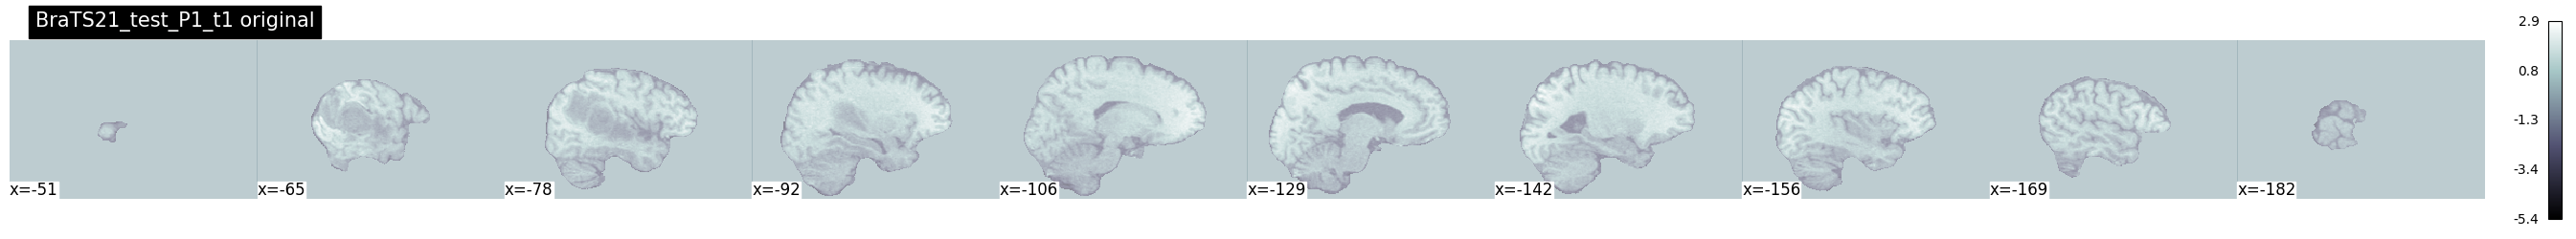

In [171]:
nlplot_nii(nl_img=t1_img, 
           title='BraTS21_test_P1_t1 original',
           display_mode='x',
           plot_type='anat',
           cut_coords=10)


/tmp/ipykernel_13157/785683278.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


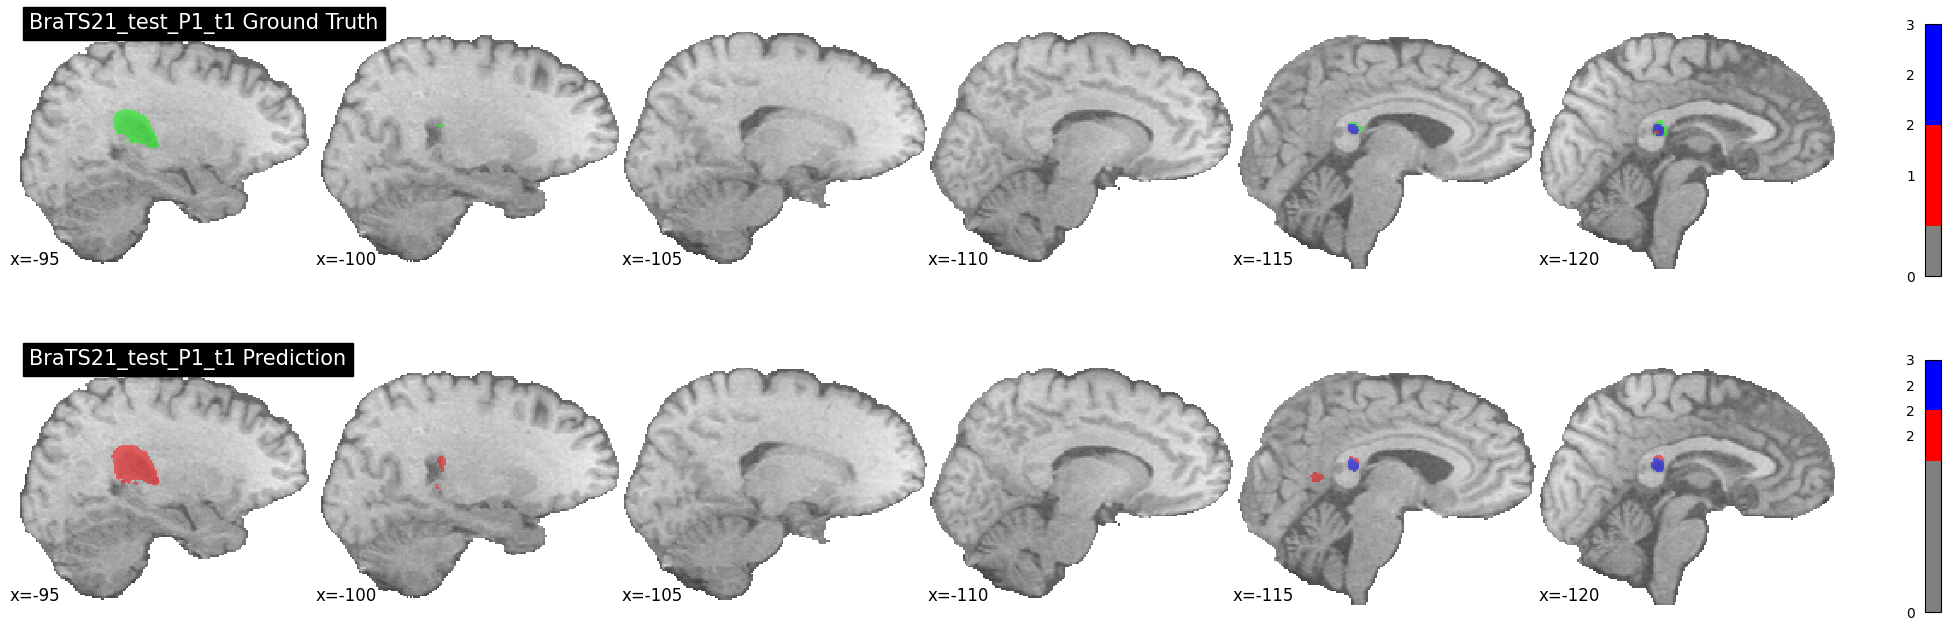

In [172]:
# x 轴
fig, ax = plt.subplots(nrows=2, figsize=(25, 8))

nlplot_nii(nl_img=mask_img,
           title='BraTS21_test_P1_t1 Ground Truth',
           plot_type='roi',
           bg_img = t1_img,
           display_mode='x',
           cmap=custom_cmap,
           alpha=0.5,
           cut_coords=x_cut_coords,
           ax=ax[0])

nlplot_nii(nl_img=pred_img,
           title='BraTS21_test_P1_t1 Prediction',
           plot_type='roi',
           bg_img = t1_img,
           display_mode='x',
           cmap=custom_cmap,
           alpha=0.5,
           cut_coords=x_cut_coords,
           ax=ax[1])

fig.show()

/tmp/ipykernel_13157/662515111.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


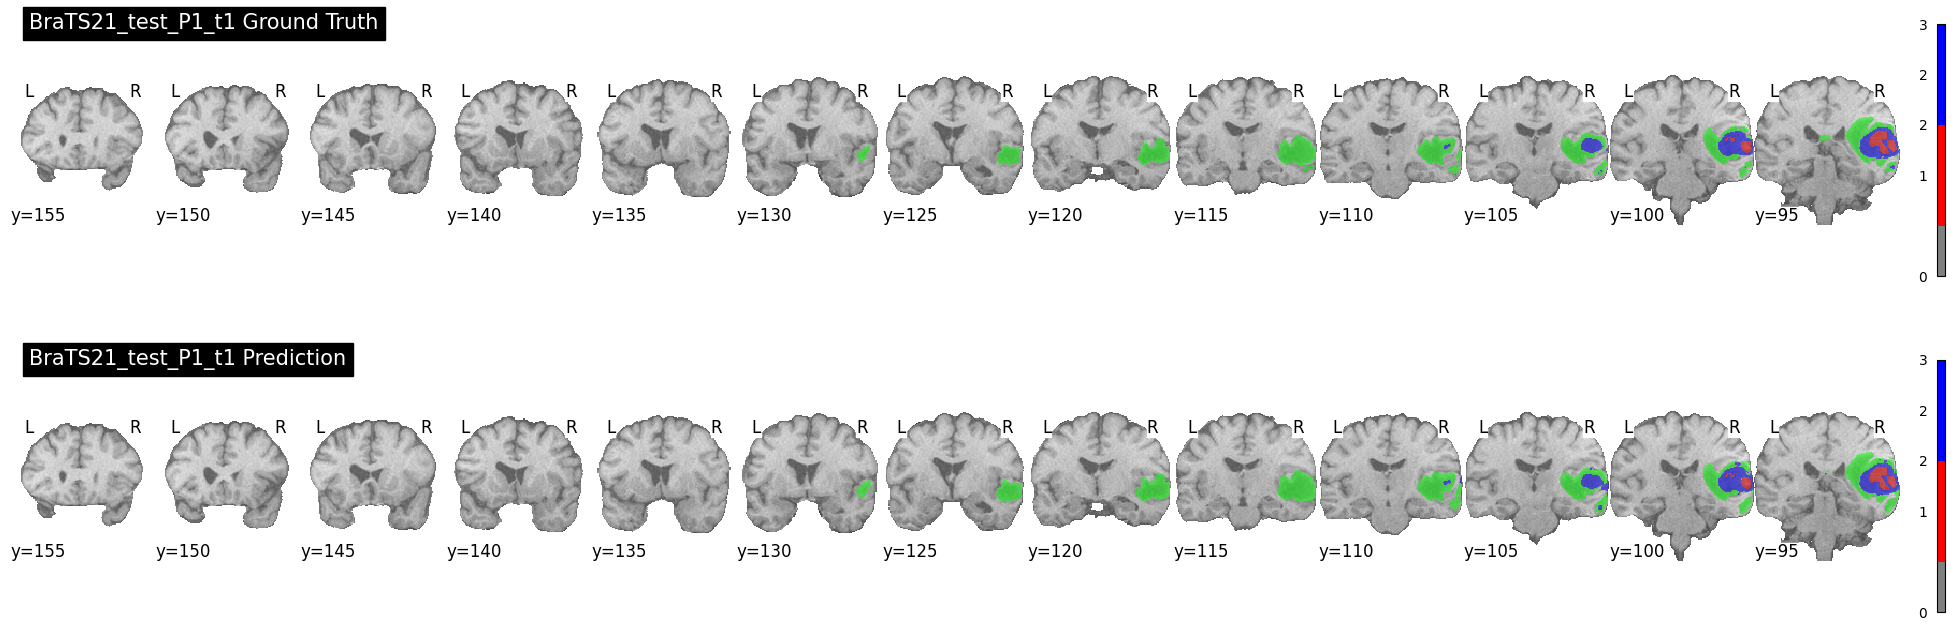

In [173]:
# y 轴
fig, ax = plt.subplots(nrows=2, figsize=(25, 8))

nlplot_nii(nl_img=mask_img,
           title='BraTS21_test_P1_t1 Ground Truth',
           plot_type='roi',
           bg_img = t1_img,
           display_mode='y',
           cmap=custom_cmap,
           alpha=0.5,
           cut_coords=y_cut_coords,
           ax=ax[0])

nlplot_nii(nl_img=pred_img,
           title='BraTS21_test_P1_t1 Prediction',
           plot_type='roi',
           bg_img = t1_img,
           display_mode='y',
           cmap=custom_cmap,
           alpha=0.5,
           cut_coords=y_cut_coords,
           ax=ax[1])

fig.show()

/tmp/ipykernel_13157/2133058533.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


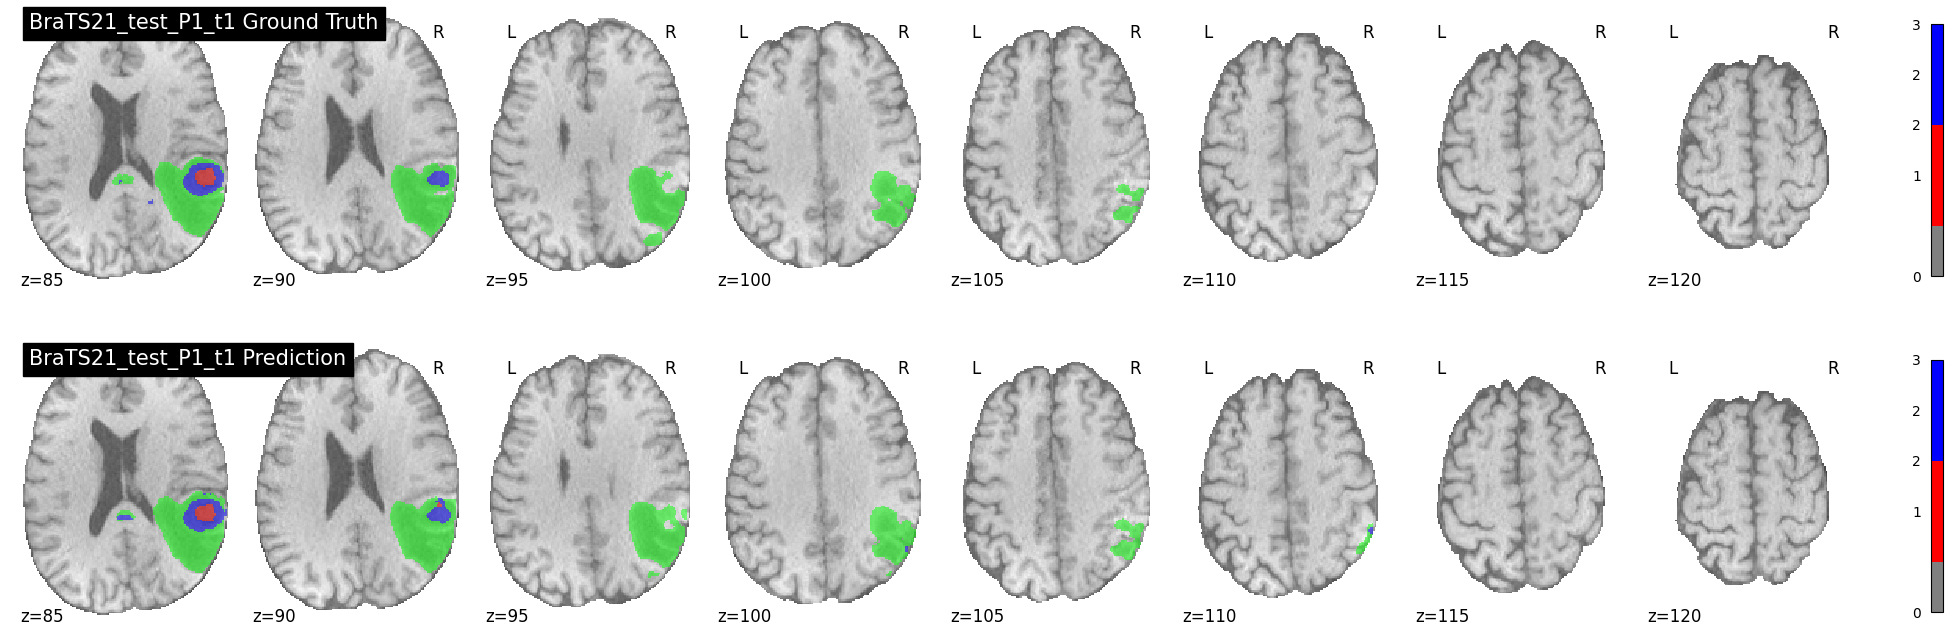

In [174]:
# z 轴
fig, ax = plt.subplots(nrows=2, figsize=(25, 8))

nlplot_nii(nl_img=mask_img,
           title='BraTS21_test_P1_t1 Ground Truth',
           plot_type='roi',
           bg_img = t1_img,
           display_mode='z',
           cmap=custom_cmap,
           alpha=0.5,
           cut_coords=z_cut_coords,
           ax=ax[0])

nlplot_nii(nl_img=pred_img,
           title='BraTS21_test_P1_t1 Prediction',
           plot_type='roi',
           bg_img = t1_img,
           display_mode='z',
           cmap=custom_cmap,
           alpha=0.5,
           cut_coords=z_cut_coords,
           ax=ax[1])

fig.show()